In [1]:
import numpy as np

printing = 0

def loadIRI(iri_file):
    #iri_file = '/Users/ost051/Documents/PhD/Electron Precipitation/example/Meta-data/iri.txt'
    skip_lines = 27
    
    #get length, define data array size
    f = open(iri_file, 'r')
    n_lines = len(f.readlines())
    data = np.zeros([n_lines - skip_lines, 15])
    f.close()
    
    #get data into data array
    f = open(iri_file, 'r')
    for i, line in enumerate(f.readlines()[skip_lines:]):
        data[i] = line.split()
    f.close()
        
    #print first few lines
    if printing:
        f = open(iri_file, 'r')
        for i in range(42):
            print(f.readline().replace('\n', ''))
            continue
        f.close()
        
    #more intuitive names and SI unit conversion
    global z_iri 
    global ne_iri     
    global t_neutral  
    global t_ion      
    global t_e        
    global rel_o_p    
    global rel_n_p    
    global rel_h_p    
    global rel_he_p   
    global rel_o2_p   
    global rel_no_p   
    z_iri        = data[:, 0]*1e3         #[height in m]
    ne_iri       = data[:, 1]*1e6         #[number density in m^3]
    t_neutral    = data[:, 3]             #[Neutral Temperature in K]
    t_ion        = data[:, 4]             #[Ion Temperature in K]
    t_e          = data[:, 5]             #[Electron Temperature in K]
    rel_o_p      = data[:, 6]             #[O+ percentage of ions]
    rel_n_p      = data[:, 7]             #[N+ percentage of ions]
    rel_h_p      = data[:, 8]             #[H+ percentage of ions]
    rel_he_p     = data[:, 9]             #[He+ percentage of ions]
    rel_o2_p     = data[:,10]             #[O2+ percentage of ions]
    rel_no_p     = data[:,11]             #[NO+ percentage of ions]
    
    #replace all values where t_e is -1 to 300:
    t_e = np.array([t if t!= -1 else 300 for t in t_e])
    
    return [z_iri     
            , ne_iri    
            , t_neutral 
            , t_ion     
            , t_e       
            , rel_o_p   
            , rel_n_p   
            , rel_h_p   
            , rel_he_p  
            , rel_o2_p  
            , rel_no_p
            ]

ModelWeb Browser Results
iri model listing
Input parameters
year= 2006., month= 12, day= 12, hour=19.,
latitude= 69.59, longitude= 20., height= 100.
Prof. parameters: start= 80. stop= 700. step= 5.

URSI maps are used for the F2 peak density (NmF2)
CCIR maps are used for the F2 peak height (hmF2)
B0-Table option is used for the bottomside thickness parameter B0
Danilov- option is used for the ion composition
The foF2 STORM model is turned on 
IRI-95    option is used for the electron temperature
IRI-95   option is used for the D-region Ne
Scotto-97 no L   option is used for the F1 occurrence probability
Peak Densities/cm-3: NmF2=  33425.8   NmF1=      0.0   NmE=   1719.4
Peak Heights/km:     hmF2=   303.06   hmF1=     0.00   hmE=   110.00

Solar Zenith Angle/degree                             124.0
Dip (Magnetic Inclination)/degree                     77.51
Modip (Modified Dip)/degree                           66.42
Solar Sunspot Number (12-months running mean) Rz12     10.9
Ionospheri

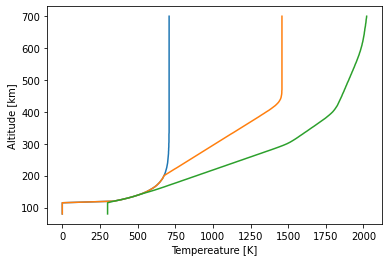

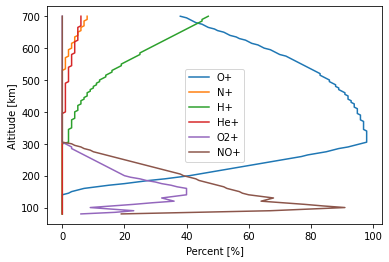

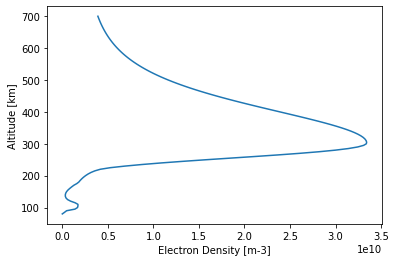

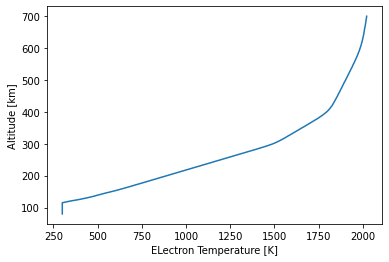

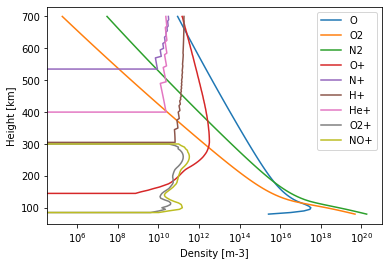

In [2]:
if printing:
    iri_file = '/Users/ost051/Documents/PhD/Electron Precipitation/example/Meta-data/iri.txt'

    loadIRI(iri_file)
    
    import matplotlib.pyplot as plt
    
    plt.figure()
    plt.plot(t_neutral, z_iri/1e3, label = 'Tn')
    plt.plot(t_ion, z_iri/1e3, label = 'Ti')
    plt.plot(t_e, z_iri/1e3, label = 'Te')
    plt.xlabel('Tempereature [K]')
    plt.ylabel('Altitude [km]')
    
    plt.figure()
    plt.plot(rel_o_p, z_iri/1e3, label = 'O+')
    plt.plot(rel_n_p, z_iri/1e3, label = 'N+')
    plt.plot(rel_h_p, z_iri/1e3, label = 'H+')
    plt.plot(rel_he_p, z_iri/1e3, label = 'He+')
    plt.plot(rel_o2_p, z_iri/1e3, label = 'O2+')
    plt.plot(rel_no_p, z_iri/1e3, label = 'NO+')
    plt.legend()
    plt.xlabel('Percent [%]')
    plt.ylabel('Altitude [km]')
    
    plt.figure()
    plt.plot(ne_iri, z_iri/1e3)
    plt.xlabel('Electron Density [m-3]')
    plt.ylabel('Altitude [km]')
    
    plt.figure()
    plt.plot(t_e, z_iri/1e3)
    plt.xlabel('ELectron Temperature [K]')
    plt.ylabel('Altitude [km]')
    
    plt.figure()
    import import_ipynb
    from loadMSIS import *
    MSISFile = '/Users/ost051/Documents/PhD/Electron Precipitation/example/Meta-data/msis.txt'
    [z_msis, n_o1_msis, n_n2_msis, n_o2_msis, mass_density, temp_n_msis, scale_height_msis] = loadMSIS(MSISFile)
    plt.plot(n_o1_msis, z_msis/1e3, label = 'O')
    plt.plot(n_o2_msis, z_msis/1e3, label = 'O2')
    plt.plot(n_n2_msis, z_msis/1e3, label = 'N2')
    plt.plot(rel_o_p*ne_iri, z_iri/1e3, label = 'O+')
    plt.plot(rel_n_p*ne_iri, z_iri/1e3, label = 'N+')
    plt.plot(rel_h_p*ne_iri, z_iri/1e3, label = 'H+')
    plt.plot(rel_he_p*ne_iri, z_iri/1e3, label = 'He+')
    plt.plot(rel_o2_p*ne_iri, z_iri/1e3, label = 'O2+')
    plt.plot(rel_no_p*ne_iri, z_iri/1e3, label = 'NO+')
    plt.ylabel('Height [km]')
    plt.xlabel('Density [m-3]')
    plt.xscale('log')
    plt.legend()
